## Machine Learning for Neuroscience, <br>Department of Brain Sciences, Faculty of Medicine, <br> Imperial College London
### Contributors: Payam Barnaghi, Francesca Palermo, Nan Fletcher-Lloyd, Alex Capstick, Yu Chen, Tianyu Cui, Marirena Bafaloukou, Ruxandra Mihai
**Spring 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')

%matplotlib inline

Number of sample

In [2]:
n= 50

In [4]:
n +5

55

Create a column vector for n samples. Make it as column using .reshape(-1,1)

In [127]:
XTest = np.linspace(-5, 5, n).reshape(-1,1)

Defining a kernel fucntion. 

Here we use the Radial Basis Function kernel or the Gaussian kernel 

$k_{\textrm{SE}}(x, x') = \sigma^2\exp\left(-\frac{(x - x')^2}{2\ell^2}\right)$


The lengthscale ℓ determines the length of the 'wiggles' in your function. In general, you won't be able to extrapolate more than ℓ units away from your data.

The output variance σ^2 determines the average distance of your function away from its mean. Every kernel has this parameter out in front; it's just a scale factor.

Source and more information: https://www.cs.toronto.edu/~duvenaud/cookbook/

In [128]:
def kernel (a, b, l, sigma):
    sqdist = np.sum(a ** 2, 1).reshape(-1,1) + np.sum(b ** 2, 1) - 2 * np.dot(a, b.T)
    return np.exp(-sigma *(1/l) * sqdist)

Default parameters for the kernel function  

In [129]:
l = 0.1
sigma = 0.5

Calclulate k**

In [130]:
Kss = kernel (XTest, XTest, l, sigma)

Choleski decomposition for K**  (K** = L * L.T)

In [131]:
L = np.linalg.cholesky(Kss + 1e-15 *np.eye(n))

x = mu + L N(0,I)  --> mu = 0 in this case

In [132]:
f_prior = np.dot(L, np.random.normal(size=(n,1)))

Training data

In [133]:
XTrain = np.array([-4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 3,5])

XTrain = XTrain.reshape(len(XTrain), 1)

In [134]:
XTrain

array([[-4. ],
       [-3.5],
       [-3. ],
       [-2.5],
       [-2. ],
       [-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 3. ],
       [ 5. ]])

In [135]:
yTrain = np.sin(XTrain) + np.random.uniform(-0.5, 0.5, 1)

In [136]:
yTrain

array([[ 0.75999301],
       [ 0.35397375],
       [-0.13792949],
       [-0.59528162],
       [-0.90610691],
       [-0.99430447],
       [-0.83828047],
       [-0.47623502],
       [ 0.00319052],
       [ 0.48261606],
       [ 0.14431053],
       [-0.95573376]])

In [137]:
K_y = kernel(XTrain, XTrain, l, sigma)

$\mu_* = k_*^{T} * K_y^{-1} * y $

$K_y = L_k * L_k^{T}$ 

$\alpha = K_y^{-1} *y = L^{-T} * L^{-1} * y$

$ m = L^{-1} * y$

$\mu_* = k_*^{T} * L^{-T} * m$

In [138]:
L_k = np.linalg.cholesky(K_y + 0.0005 * np.eye(len(XTrain)))

In [139]:
Ks = kernel(XTrain, XTest, l, sigma)

L = np.linalg.solve(L_k, Ks)

In [140]:
mu = np.dot(L.T, np.linalg.solve(L_k, yTrain)).reshape((n,))

In [141]:
sigma_square = np.diag(Kss) - np.sum(Lk ** 2, axis=0)

In [142]:
sigma = np.sqrt(sigma_square)

In [143]:
L = np.linalg.cholesky(Kss + 1e-16 * np.eye(n) - np.dot(Lk.T, Lk))

In [144]:
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,1)))

Plot the results

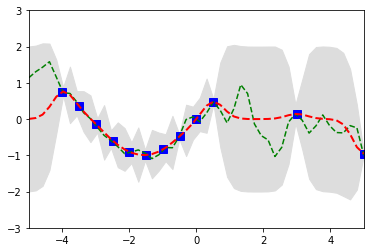

In [145]:
plt.plot(XTrain, yTrain, 'bs', ms=8)
plt.plot(XTest, f_post, 'g--')

plt.gca().fill_between(XTest.flat, mu - 2 *sigma, mu + 2 *sigma, color='#dddddd')

plt.plot(XTest, mu, 'r--', lw=2)

plt.axis([-5, 5, -3, 3])

plt.show()